In [1]:
from keras.layers import Convolution2D ,MaxPooling2D,Flatten
from keras.layers.core import Dense, Dropout, Activation
from sklearn.cross_validation import train_test_split
from keras.callbacks import History,Callback
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import np_utils
from keras import backend as K
import theano.tensor as T
import theano
import keras
import pickle


Using Theano backend.
Using gpu device 0: GeForce 940M (CNMeM is disabled, CuDNN not available)
C:\Users\Back_jud\Anaconda2\lib\site-packages\theano\tensor\signal\downsample.py:6: UserWarning:

downsample module has been moved to the theano.tensor.signal.pool module.



In [2]:
def cat2lab (x):
    '''only for binary category'''
    return [0 if s[0] else 1 for s in x]

In [3]:
# print(theano.config)

In [4]:
#np.distutils.__config__.show()

### dram-> vram / bottleneck

### direct to gpu

### Load pickle and formatting

In [5]:
a = open('d://labels_new.p')
b = open('d://images_new.p')
labels = np.array(pickle.load(a))
imgs = np.array(pickle.load(b))
imgs = imgs /255
labels = np_utils.to_categorical(labels,nb_classes=2)


In [6]:
orimgs =[]
for a in imgs:
    orimgs.append(np.reshape(a,(50,50))) 

In [7]:
x_tr,x_te,y_tr,y_te = train_test_split(orimgs,labels,test_size= 0.2,random_state= 123)

In [8]:
x_tr1,x_te1,y_tr1,y_te1 = train_test_split(imgs,labels,test_size= 0.2,random_state= 123)

In [9]:
x_tr1[0]

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

## Trial1.Simple neuron

In [10]:
model1 = Sequential()
model1.add(Dense(2500, input_dim=2500,init ='uniform'))
model1.add(Activation('relu'))
model1.add(Dense(2, activation="softmax"))
model1.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01,decay= 1e-6,momentum=0.9,nesterov=True))

In [11]:
%time hist1 = model1.fit(np.array(x_tr1), np.array(y_tr1), nb_epoch=300,validation_split=0.1 ,batch_size=50,show_accuracy=True,verbose=0)

Wall time: 44.6 s


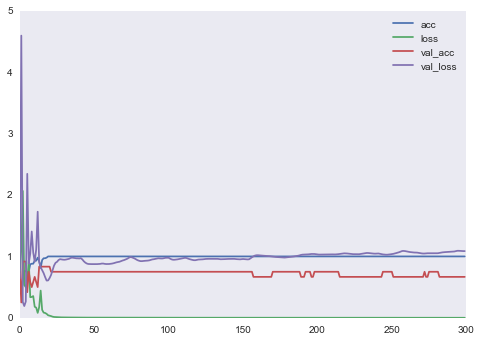

In [12]:
plt.plot(hist1.history['acc'],label='acc')
plt.plot(hist1.history['loss'],label='loss')
plt.plot(hist1.history['val_acc'],label='val_acc')
plt.plot(hist1.history['val_loss'],label='val_loss')
plt.grid('off')
plt.legend()

In [13]:
model1.evaluate(np.array(x_te1),y_te1,batch_size=50,show_accuracy=True)

29/29 [==============================] - 0s


[1.2852578163146973, 0.72413793103448276]

In [14]:
model1.summary()

--------------------------------------------------------------------------------
Initial input shape: (None, 2500)
--------------------------------------------------------------------------------
Layer (name)                  Output Shape                  Param #             
--------------------------------------------------------------------------------
Dense (dense)                 (None, 2500)                  6252500             
Activation (activation)       (None, 2500)                  0                   
Dense (dense)                 (None, 2)                     5002                
--------------------------------------------------------------------------------
Total params: 6257502
--------------------------------------------------------------------------------


In [15]:
y_pred1 = model1.predict_classes(np.array(x_te1),20)

29/29 [==============================] - 0s     


In [16]:
y_ten1 = cat2lab(y_te1)

In [17]:
print(classification_report(y_ten1,y_pred1))

             precision    recall  f1-score   support

          0       0.62      0.73      0.67        11
          1       0.81      0.72      0.76        18

avg / total       0.74      0.72      0.73        29



In [18]:
for i in model1.get_weights():
    print(np.shape(i))

(2500L, 2500L)
(2500L,)
(2500L, 2L)
(2L,)


## Trial2. CNN

In [19]:
#imgs for CNN
imgs2d= []
for img in imgs:
    imgs2d.append(np.reshape(img,(1,50,50)))


In [20]:
x_tr2,x_te2,y_tr2,y_te2 = train_test_split(imgs2d,labels,test_size= 0.2,random_state= 123)

In [21]:
model2 = Sequential()
history2 = History()
model2.add(Convolution2D(10,10, 10, border_mode='same', input_shape=(1, 50, 50)))
model2.add(Activation('relu'))
# model2.add(Convolution2D(50, 5, 5,init='uniform'))
# model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Convolution2D(10, 10, 10,init='uniform' ,border_mode='same'))
model2.add(Activation('relu'))
# model2.add(Convolution2D(100, 5, 5,init='uniform'))
# model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(1250,init='uniform'))
model2.add(Activation('relu'))
model2.add(Dense(2,activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01,
                                                              decay=1e-6,
                                                              momentum=0.6, 
                                                              nesterov=True))

In [22]:
%time hist2 = model2.fit(np.array(x_tr2), y_tr2, nb_epoch=150 , batch_size=40 ,validation_split=0.2, show_accuracy=True ,shuffle=True,callbacks=[history2])

Train on 90 samples, validate on 23 samples
Epoch 1/150
90/90 [==============================] - 0s - loss: 0.7639 - acc: 0.5000 - val_loss: 0.7446 - val_acc: 0.3913
Epoch 2/150
90/90 [==============================] - 0s - loss: 0.6853 - acc: 0.5778 - val_loss: 0.6631 - val_acc: 0.6522
Epoch 3/150
90/90 [==============================] - 0s - loss: 0.6395 - acc: 0.6556 - val_loss: 0.6854 - val_acc: 0.5217
Epoch 4/150
90/90 [==============================] - 0s - loss: 0.6251 - acc: 0.7111 - val_loss: 0.6762 - val_acc: 0.4783
Epoch 5/150
90/90 [==============================] - 0s - loss: 0.6631 - acc: 0.6000 - val_loss: 0.8017 - val_acc: 0.6087
Epoch 6/150
90/90 [==============================] - 0s - loss: 0.8725 - acc: 0.5778 - val_loss: 0.6893 - val_acc: 0.5217
Epoch 7/150
90/90 [==============================] - 0s - loss: 0.6667 - acc: 0.7111 - val_loss: 0.6959 - val_acc: 0.4348
Epoch 8/150
90/90 [==============================] - 0s - loss: 0.6740 - acc: 0.5778 - val_loss: 0.696

In [23]:
model2.summary()

--------------------------------------------------------------------------------
Initial input shape: (None, 1, 50, 50)
--------------------------------------------------------------------------------
Layer (name)                  Output Shape                  Param #             
--------------------------------------------------------------------------------
Convolution2D (convolution2d) (None, 10, 50, 50)            1010                
Activation (activation)       (None, 10, 50, 50)            0                   
MaxPooling2D (maxpooling2d)   (None, 10, 25, 25)            0                   
Dropout (dropout)             (None, 10, 25, 25)            0                   
Convolution2D (convolution2d) (None, 10, 25, 25)            10010               
Activation (activation)       (None, 10, 25, 25)            0                   
MaxPooling2D (maxpooling2d)   (None, 10, 12, 12)            0                   
Dropout (dropout)             (None, 10, 12, 12)            0         

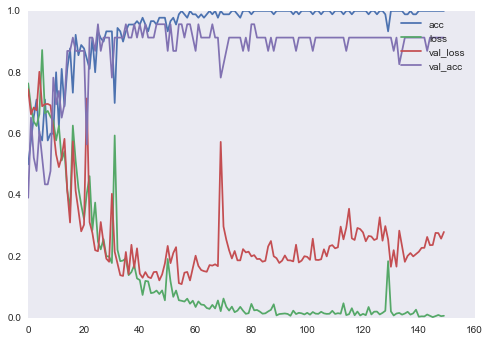

In [24]:
plt.plot(hist2.history['acc'],label='acc')
plt.plot(hist2.history['loss'],label='loss')
plt.plot(hist2.history['val_loss'],label='val_loss')
plt.plot(hist2.history['val_acc'],label='val_acc')
plt.legend()
plt.grid('off')

In [25]:
m2_wegh =  model2.get_weights()

In [26]:
model2.evaluate(np.array(x_te2),y_te2,batch_size=50,show_accuracy=True,verbose=1)

29/29 [==============================] - 0s


[0.35862597823143005, 0.93103448275862066]

In [27]:
def plot_wegh (model):
    '''
    Plot weights of convolution layer
    only for first layer
    
    #Args
    model : fitted model
    '''
    wegh_arr = model.get_weights()
    num = len(wegh_arr[0])
    if type(np.sqrt(num)) is int:
        col = np.sqrt(num)
        row = np.sqrt(num) 
    else:
        col = int(num/2)
        row = int(num/col)
        
    fig ,axes = plt.subplots(row,col, subplot_kw={'xticks': [], 'yticks': []})
    plt.subplots_adjust(hspace=0.02,wspace = 0.05)
    
    for i, ax in zip(xrange(num),axes.flat):
        
        ax.imshow(wegh_arr[0][i][0])
        ax.grid('off')
    plt.show()

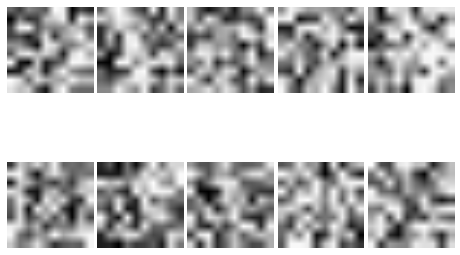

In [28]:
plot_wegh(model2)

In [29]:
m2_wegh = model2.get_weights()
for a in m2_wegh:
    print(np.shape(a))

(10L, 1L, 10L, 10L)
(10L,)
(10L, 10L, 10L, 10L)
(10L,)
(1440L, 1250L)
(1250L,)
(1250L, 2L)
(2L,)


In [30]:
s = 0
for a in m2_wegh[0]:
    s +=a[0]
    print(s)

[[ 0.07418927  0.1430741   0.02453059  0.06455074  0.10467906 -0.23005356
  -0.17824274  0.22771966  0.12387523  0.17248526]
 [ 0.22891882  0.02765426  0.1621221   0.14253011 -0.06549755 -0.09797908
  -0.18679333  0.19248219 -0.21944144 -0.05894414]
 [ 0.12646101 -0.18065214 -0.22698802  0.11215076  0.00725033  0.03477551
   0.00833952 -0.07207317 -0.03830424  0.11927665]
 [ 0.13565861  0.11918296  0.19730575  0.09652358 -0.14485154  0.16248475
  -0.02079122 -0.06901824 -0.2242575   0.06003168]
 [ 0.00242668  0.00356161  0.11482441  0.2202172  -0.17065907 -0.12773921
   0.03875421  0.05152614 -0.02728023 -0.13622335]
 [ 0.11054812 -0.1228752  -0.18189842 -0.04744179 -0.11331531 -0.02799909
   0.1882612  -0.11453771 -0.21650128 -0.02513698]
 [-0.2255633   0.20154059  0.23318018 -0.09013356  0.18793207  0.12449389
   0.05637023 -0.21450128 -0.19486138 -0.13614188]
 [ 0.20669445  0.1829592  -0.08956315 -0.05294123  0.19708109 -0.02951103
  -0.20646864  0.02066872  0.07211804  0.09609867]


In [31]:
y_pred2 = model2.predict_classes(np.array(x_te2))

29/29 [==============================] - 0s


In [32]:
y_pred2

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [33]:
y_ten2 = [0 if s[0] else 1 for s in y_te2]

In [34]:
np.array(y_ten2)

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1])

In [35]:
model2.predict_proba(np.array(x_te2))

29/29 [==============================] - 0s


array([[  1.44644768e-03,   9.98553574e-01],
       [  9.99540329e-01,   4.59693780e-04],
       [  9.85533834e-01,   1.44661423e-02],
       [  1.09466411e-04,   9.99890566e-01],
       [  4.97276299e-02,   9.50272322e-01],
       [  5.57071939e-02,   9.44292784e-01],
       [  9.01160836e-01,   9.88391861e-02],
       [  3.63904255e-05,   9.99963641e-01],
       [  9.21256506e-05,   9.99907851e-01],
       [  1.71261796e-04,   9.99828696e-01],
       [  9.04983580e-01,   9.50163677e-02],
       [  9.99414206e-01,   5.85763191e-04],
       [  3.50437649e-02,   9.64956284e-01],
       [  9.99748886e-01,   2.51168356e-04],
       [  9.99931455e-01,   6.85254490e-05],
       [  9.99992728e-01,   7.24816482e-06],
       [  4.91123705e-04,   9.99508858e-01],
       [  5.25929063e-05,   9.99947429e-01],
       [  9.95676577e-01,   4.32346063e-03],
       [  4.30412851e-02,   9.56958711e-01],
       [  6.74042385e-04,   9.99325991e-01],
       [  4.17116571e-05,   9.99958277e-01],
       [  

In [36]:
import PIL

In [37]:
np.shape(x_te)

(29L, 50L, 50L)

(-0.5, 49.5, 49.5, -0.5)

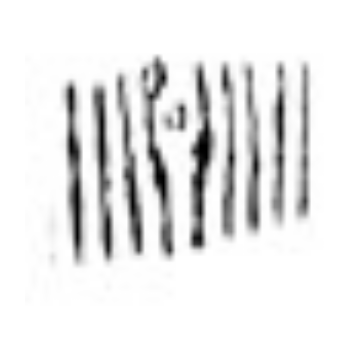

In [38]:
plt.imshow(x_te2[19][0])
plt.axis('off')

(-0.5, 49.5, 49.5, -0.5)

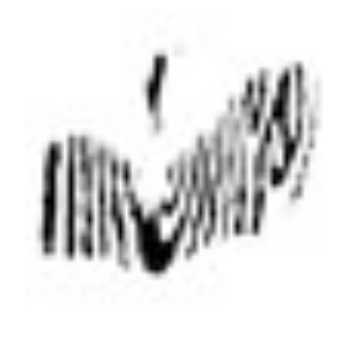

In [39]:
plt.imshow(x_te2[-7][0])
plt.axis('off')

In [40]:
cr = classification_report(y_ten2,y_pred2)

In [41]:
print(cr)

             precision    recall  f1-score   support

          0       1.00      0.82      0.90        11
          1       0.90      1.00      0.95        18

avg / total       0.94      0.93      0.93        29



In [42]:
model3 = Sequential()
history3 = History()
model3.add(Convolution2D(50,5, 5, border_mode='same',init='uniform',activation='relu' ,input_shape=(1, 50, 50)))
# model3.add(Convolution2D(50, 5, 5,,activation='logistic' ,init='uniform'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.50))

# model3.add(Convolution2D(100, 5, 5, border_mode='same'))
# model3.add(Activation('LSTM'))
# model3.add(Convolution2D(100, 5, 5,init='uniform'))
# model3.add(Activation('LSTM'))
# model3.add(MaxPooling2D(pool_size=(2, 2)))
# model3.add(Dropout(0.25))

model3.add(Flatten())
model3.add(Dense(1250,init='uniform'))
model3.add(Activation('relu'))
model3.add(Dense(2,activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True))

In [43]:
%time hist3 = model3.fit(np.array(x_tr2), y_tr2, nb_epoch=50 , batch_size=50 ,validation_split=0.2, show_accuracy=True , shuffle=True,callbacks=[history3])

Train on 90 samples, validate on 23 samples
Epoch 1/50
90/90 [==============================] - 1s - loss: 0.7003 - acc: 0.5667 - val_loss: 0.6805 - val_acc: 0.5217
Epoch 2/50
90/90 [==============================] - 1s - loss: 0.6821 - acc: 0.5889 - val_loss: 0.6737 - val_acc: 0.6087
Epoch 3/50
90/90 [==============================] - 1s - loss: 0.6542 - acc: 0.6889 - val_loss: 0.6636 - val_acc: 0.6957
Epoch 4/50
90/90 [==============================] - 1s - loss: 0.6160 - acc: 0.6556 - val_loss: 0.6305 - val_acc: 0.6957
Epoch 5/50
90/90 [==============================] - 1s - loss: 0.5948 - acc: 0.6889 - val_loss: 0.5898 - val_acc: 0.7826
Epoch 6/50
90/90 [==============================] - 1s - loss: 0.5450 - acc: 0.8000 - val_loss: 0.5722 - val_acc: 0.8261
Epoch 7/50
90/90 [==============================] - 1s - loss: 0.5050 - acc: 0.8444 - val_loss: 0.5878 - val_acc: 0.6957
Epoch 8/50
90/90 [==============================] - 1s - loss: 0.4659 - acc: 0.8222 - val_loss: 0.5221 - val_

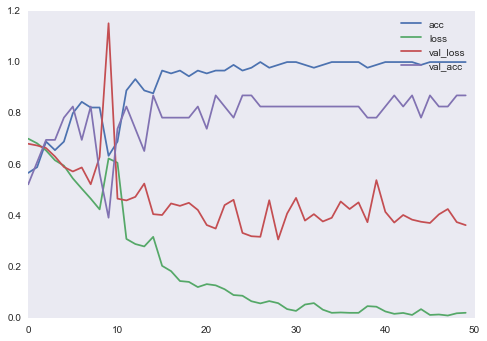

In [44]:
plt.plot(hist3.history['acc'],label='acc')
plt.plot(hist3.history['loss'],label='loss')
plt.plot(hist3.history['val_loss'],label='val_loss')
plt.plot(hist3.history['val_acc'],label='val_acc')
plt.legend()
plt.grid('off')

In [45]:
model3.evaluate(np.array(x_te2),y_te2,show_accuracy=True)

29/29 [==============================] - 0s


[0.68722707033157349, 0.75862068965517238]

In [46]:
y_pred3 = model3.predict_classes(np.array(x_te2))

29/29 [==============================] - 0s


In [47]:
model3.evaluate(np.array(x_te2),y_te2,batch_size=50,show_accuracy=True)

29/29 [==============================] - 0s


[0.68722707033157349, 0.75862068965517238]

In [48]:
print(classification_report(y_ten2,y_pred3))

             precision    recall  f1-score   support

          0       0.67      0.73      0.70        11
          1       0.82      0.78      0.80        18

avg / total       0.76      0.76      0.76        29



In [49]:
model3.summary()

--------------------------------------------------------------------------------
Initial input shape: (None, 1, 50, 50)
--------------------------------------------------------------------------------
Layer (name)                  Output Shape                  Param #             
--------------------------------------------------------------------------------
Convolution2D (convolution2d) (None, 50, 50, 50)            1300                
MaxPooling2D (maxpooling2d)   (None, 50, 25, 25)            0                   
Dropout (dropout)             (None, 50, 25, 25)            0                   
Flatten (flatten)             (None, 31250)                 0                   
Dense (dense)                 (None, 1250)                  39063750            
Activation (activation)       (None, 1250)                  0                   
Dense (dense)                 (None, 2)                     2502                
----------------------------------------------------------------------

In [50]:
y_pred3

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1], dtype=int64)

In [51]:
np.array(y_ten2)

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1])

## SVM

### sample수 부족??? sample 수 늘리니 결과 향상

In [52]:
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

In [53]:
params4 = {'C' : [1e1, 1e2, 1e3,1e4,1e5],
           'gamma' : [0.0001,0.0005,0.001,0.005,0.01]}

In [54]:
clf = GridSearchCV(SVC(kernel='rbf'),params4)

In [55]:
y_trn4 = cat2lab(y_tr1)
model4 = clf.fit(x_tr1,y_trn4)

In [56]:
model4.score(x_te1,cat2lab(y_te1))

0.89655172413793105

In [57]:
clf2 = SVC(kernel='rbf',C=10.0,gamma = 0.01)


In [58]:
model5 = clf2.fit(x_tr1,y_trn4)


In [59]:
model5.score(x_te1,cat2lab(y_te1))

0.89655172413793105

In [60]:
model4.best_score_ ,model4.best_params_

(0.80530973451327437, {'C': 10.0, 'gamma': 0.01})

In [61]:
y_pred4 = model4.predict(x_te1)
y_pred4

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1])

In [62]:
y_ten4 = cat2lab(y_te1)
y_ten4

[0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1]

In [63]:
print(classification_report(y_ten4,y_pred4))

             precision    recall  f1-score   support

          0       0.90      0.82      0.86        11
          1       0.89      0.94      0.92        18

avg / total       0.90      0.90      0.90        29



In [64]:
import pywt

In [65]:
Ca,Cd = pywt.dwt2(x_tr[25],'haar')

In [66]:
np.shape(Ca)

(25L, 25L)

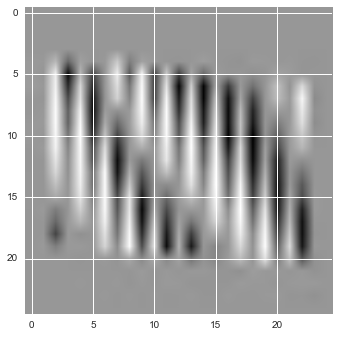

In [67]:
plt.imshow(Cd[1])

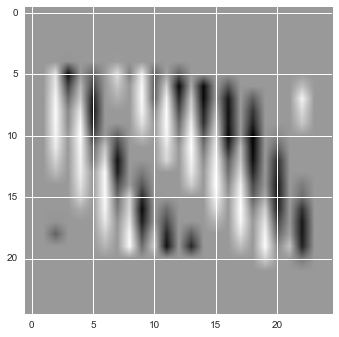

In [68]:
plt.imshow(pywt.threshold(Cd[1],0.3))

### Hough

In [69]:
from cv2 import HoughLines
from cv2 import HoughLinesP
import cv2

In [70]:
from os import listdir

In [71]:
asdf = listdir('d://nor/')

In [72]:
ima = cv2.imread('d://nor/'+asdf[1],1)

In [73]:
imb = cv2.Canny(ima,100,250)

### ensenble and ranfo

In [74]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [75]:
# bdt = AdaBoostClassifier(RandomForestClassifier(n_estimators),
#                          algorithm="SAMME",
#                          n_estimators=200)


bdt = AdaBoostClassifier(DecisionTreeClassifier(class_weight='balanced',max_depth=10),
                         algorithm="SAMME",
                         n_estimators=200)

bdt.fit(x_tr1, cat2lab(y_tr1))


AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)

In [76]:
bdt.feature_importances_

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [77]:
np.shape(x_te1)

(29L, 2500L)

In [78]:
bdt.predict_proba(x_te1)

array([[ 0.73105858,  0.26894142],
       [ 0.26894142,  0.73105858],
       [ 0.73105858,  0.26894142],
       [ 0.73105858,  0.26894142],
       [ 0.73105858,  0.26894142],
       [ 0.26894142,  0.73105858],
       [ 0.26894142,  0.73105858],
       [ 0.73105858,  0.26894142],
       [ 0.73105858,  0.26894142],
       [ 0.26894142,  0.73105858],
       [ 0.26894142,  0.73105858],
       [ 0.73105858,  0.26894142],
       [ 0.73105858,  0.26894142],
       [ 0.73105858,  0.26894142],
       [ 0.73105858,  0.26894142],
       [ 0.26894142,  0.73105858],
       [ 0.26894142,  0.73105858],
       [ 0.73105858,  0.26894142],
       [ 0.73105858,  0.26894142],
       [ 0.26894142,  0.73105858],
       [ 0.73105858,  0.26894142],
       [ 0.73105858,  0.26894142],
       [ 0.73105858,  0.26894142],
       [ 0.73105858,  0.26894142],
       [ 0.73105858,  0.26894142],
       [ 0.26894142,  0.73105858],
       [ 0.26894142,  0.73105858],
       [ 0.73105858,  0.26894142],
       [ 0.73105858,

In [79]:
bdt.score(x_te1,cat2lab(y_te1))

0.44827586206896552